In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
#model class
class Model(nn.Module):

  #initialisation
  def __init__(self, input_features : int = 4, hidden1 : int = 8, hidden2 : int = 9, output_features : int = 3):
    super().__init__()
    self.fc1 = nn.Linear(input_features, hidden1)
    self.fc2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, output_features)

  def feedForward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [4]:
#picking a manual seed for randomisation
torch.manual_seed(32)

#creating an instance of the model class
model : Model = Model()

In [5]:
url : str = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
#creating a dataframe
df = pd.read_csv(url)

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
df["variety"] = df["variety"].replace("Setosa", 0.0)
df["variety"] = df["variety"].replace("Versicolor", 1.0)
df["variety"] = df["variety"].replace("Virginica", 2.0)

In [8]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [9]:
#Initilising x and y dataset
x = df.drop("variety", axis = 1)
y = df["variety"]

In [10]:
#converting the x and y datasets into numpy arrays
x = x.values
y = y.values

In [11]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

In [12]:
#converting x and y numPy arrays to tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
#setting the criterion to measure the error
criterion = nn.CrossEntropyLoss()

In [14]:
#choosing an optimizer and lowering the learning rate if the error doesn't decrese after a few epochs
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [15]:
# Training the model

epochs : int = 100
losses = []

for i in range(epochs):
  #feeding forward
  y_pred = model.feedForward(x_train)

  #measuring the loss/error
  loss = criterion(y_pred, y_train)

  #keeping track of the loss
  losses.append(loss.detach().numpy())

  #printing every 10 epochs
  if (i + 1) % 10 == 0:
    print(f"Epoch : {i + 1}, Loss : {loss}")

  #Back Propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 10, Loss : 0.9718380570411682
Epoch : 20, Loss : 0.8112219572067261
Epoch : 30, Loss : 0.6582313179969788
Epoch : 40, Loss : 0.4558870494365692
Epoch : 50, Loss : 0.30417463183403015
Epoch : 60, Loss : 0.18637295067310333
Epoch : 70, Loss : 0.12002668529748917
Epoch : 80, Loss : 0.09114781022071838
Epoch : 90, Loss : 0.0783601775765419
Epoch : 100, Loss : 0.07180201262235641


Text(0, 0.5, 'Loss')

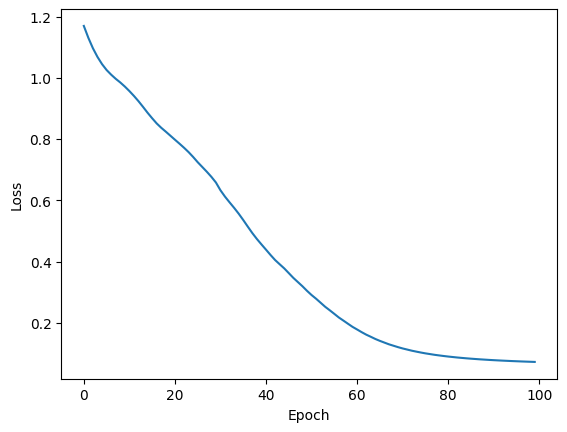

In [16]:
#Plotting the epochs and losses
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [17]:
#Evaluating the model
with torch.no_grad():
  y_eval = model.feedForward(x_test)
  loss = criterion(y_eval, y_test)

In [18]:
loss

tensor(0.0538)

In [19]:
#Evaluating on new data
with torch.no_grad():
  pred = model.feedForward(torch.tensor([5.9, 3.0, 5.1, 1.0]))

pred

tensor([-2.9011,  4.5853, -0.5213])

In [20]:
#Saving the model
torch.save(model.state_dict(), "IrisModel.pt")